In [2]:
import numpy as np
from ppopt.mplp_program import MPLP_Program
from ppopt.mpmodel import MPModeler
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.plot import parametric_plot
from numpy.polynomial.legendre import leggauss
import copy
from typing import Union
from collections import defaultdict

In [3]:
m = MPModeler()

u = m.add_var(name='u')
x = m.add_var(name='x')
z = m.add_var(name='z')

t1 = m.add_param(name='t1')
t2 = m.add_param(name='t2')
d1 = m.add_param(name='d1')
d2 = m.add_param(name='d2')

In [4]:
m.add_constr(2*x - 3*z + t1 - d2 == 0)
m.add_constr(x - z/2 -t1/2 +t2/2 +d1 -7*d2/2 <= u)
m.add_constr(-2*x +2*z -4*t1/3 -t2 +2*d2 +1/3<= u)
m.add_constr(-x + 5*z/2 +t1/2 -t2 -d1 +d2/2 -1 <= u)
m.add_constr(-50 <= x)
m.add_constr(0-50 <= z)
m.add_constr(0 <= t1)
m.add_constr(0 <= t2)
m.add_constr(0 <= d1)
m.add_constr(0 <= d2)
m.add_constr(t1 <= 4)
m.add_constr(t2 <= 4)
m.add_constr(d1 <= 5)
m.add_constr(d2 <= 5)

In [5]:
m.set_objective(u)

In [6]:
prob = m.formulate_problem()
prob.process_constraints()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-12-20


In [7]:
solution = solve_mpqp(problem=prob, algorithm=mpqp_algorithm.combinatorial)

In [8]:
psi_matrix = np.empty((len(solution), solution.critical_regions[0].A.shape[1] + solution.critical_regions[0].b.shape[1]))
psi_idx = 0

In [9]:
psi_matrix

array([[ 5.01426536, 24.50218649,  4.        ,  0.        ,  0.        ],
       [ 5.        ,  0.        ,  4.        ,  5.        ,  0.        ]])

In [10]:
np.concatenate([solution.critical_regions[0].A[0,:], solution.critical_regions[0].b[0,:]], axis=0)

array([-0.66666667, -0.25      ,  0.5       , -1.        ,  0.16666667])

In [11]:
# for i in range(len(solution.critical_regions)):
#     psi_matrix[i] = np.concatenate([solution.critical_regions[i].A[psi_idx,:], solution.critical_regions[i].b[psi_idx,:]], axis=0)
    
for i, region in enumerate(solution.critical_regions):
    psi_matrix[i] = np.concatenate([region.A[psi_idx,:], region.b[psi_idx,:]], axis=0)

In [12]:
psi_matrix

array([[-0.66666667, -0.25      ,  0.5       , -1.        ,  0.16666667],
       [ 0.33333333, -1.        , -0.5       ,  0.5       , -0.33333333]])

In [13]:
m_t1 = MPModeler()

t1_max = m_t1.add_var('t1_max')
t1_min = m_t1.add_var('t1_min')
t2_a = m_t1.add_var('t2_a')
t2_b = m_t1.add_var('t2_b')

d1 = m_t1.add_param('d1')
d2 = m_t1.add_param('d2')

In [14]:
m_t1.add_constr(-2/3*t1_max - 1/4*t2_a +1/2*d1 - d2 +1/6 <= 0)
m_t1.add_constr(1/3*t1_max -t2_a -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t1.add_constr(-2/3*t1_min - 1/4*t2_b +1/2*d1 - d2 +1/6 <= 0)
m_t1.add_constr(1/3*t1_min -t2_b -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t1.add_constr(t1_min <= t1_max)

m_t1.add_constr(0 <= t1_max)
m_t1.add_constr(0 <= t1_min)
m_t1.add_constr(0 <= t2_a)
m_t1.add_constr(0 <= t2_b)
m_t1.add_constr(t1_max <= 4)
m_t1.add_constr(t1_min <= 4)
m_t1.add_constr(t2_a <= 4)
m_t1.add_constr(t2_b <= 4)

m_t1.add_constr(0 <= d1)
m_t1.add_constr(0 <= d2)
m_t1.add_constr(d1 <= 5)
m_t1.add_constr(d2 <= 5)

In [15]:
m_t1.set_objective(t1_min-t1_max)

In [16]:
prob_t1 = m_t1.formulate_problem()
prob_t1.process_constraints()

In [17]:
solution_t1 = solve_mpqp(problem=prob_t1, algorithm=mpqp_algorithm.geometric)

Using a found active set [6, 9, 11, 12]


In [18]:
print(f'Number of critical regions: {len(solution_t1)}')

Number of critical regions: 2


In [19]:
len(solution_t1.critical_regions)

2

In [20]:
solution_t1.critical_regions[0]

Critical region with active set [6, 9, 11, 12]
The Omega Constraint indices are [0, 1, 2, 3]
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[2], [2]]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 b = [[4.]
 [0.]
 [4.]
 [4.]] 
 C = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 d = [[1.]
 [1.]
 [0.]
 [0.]] 
 E = [[ 0.4472136  -0.89442719]
 [-1.          0.        ]
 [ 0.         -1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]] 
 f = [[ 0.74535599]
 [-0.        ]
 [-0.        ]
 [ 5.        ]
 [ 5.        ]]

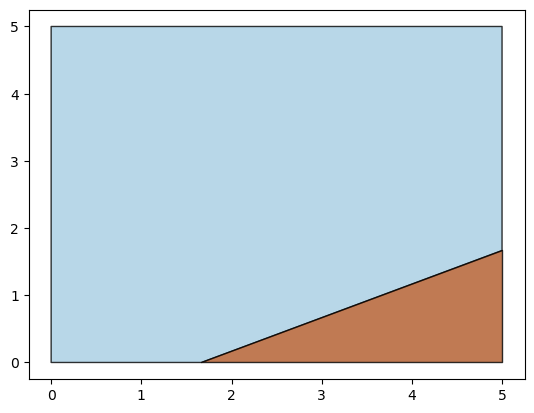

In [21]:
parametric_plot(solution_t1, show=True)

In [22]:
m_t2 = MPModeler()

t2_max = m_t2.add_var('t2_max')
t2_min = m_t2.add_var('t2_min')

t1 = m_t2.add_param('t1')
d1 = m_t2.add_param('d1')
d2 = m_t2.add_param('d2')

In [23]:
m_t2.add_constr(-2/3*t1 - 1/4*t2_max +1/2*d1 - d2 +1/6 <= 0)
m_t2.add_constr(1/3*t1 -t2_max -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t2.add_constr(-2/3*t1 - 1/4*t2_min +1/2*d1 - d2 +1/6 <= 0)
m_t2.add_constr(1/3*t1 -t2_min -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t2.add_constr(t2_min <= t2_max)

m_t2.add_constr(0 <= t2_max)
m_t2.add_constr(0 <= t2_min)
m_t2.add_constr(t2_max <= 4)
m_t2.add_constr(t2_min <= 4)

m_t2.add_constr(0 <= t1)
m_t2.add_constr(0 <= d1)
m_t2.add_constr(0 <= d2)
m_t2.add_constr(t1 <= 4)
m_t2.add_constr(d1 <= 5)
m_t2.add_constr(d2 <= 5)

In [24]:
m_t2.set_objective(-(t2_max-t2_min))

In [25]:
prob_t2 = m_t2.formulate_problem()
prob_t2.process_constraints()

In [26]:
solution_t2 = solve_mpqp(problem=prob_t2, algorithm=mpqp_algorithm.geometric)

Using a found active set [6, 7]


In [27]:
print(f'Number of critical regions: {len(solution_t2)}')

Number of critical regions: 3


In [28]:
# np.concatenate([crt2_list[2].A, crt2_list[2].b], axis=1)[:2, :]

In [29]:
def gauss_legendre_between_bounds(expr_coeffs: np.ndarray, n_gl: int, max_idx: int = 0, min_idx: int = 1):
    """
    Generate n Gauss–Legendre quadrature points and weights between min and max bounds
    defined by two linear expressions.

    Parameters:
        expr_coeffs (np.ndarray): 2xD array. Row 0 = max point coefficients, Row 1 = min.
        n (int): Number of quadrature points.

    Returns:
        points (np.ndarray): (n, D) array of quadrature points.
        weights (np.ndarray): (n,) array of weights.
    """
    if expr_coeffs.shape[0] != 2:
        raise ValueError("expr_coeffs must have two rows")

    max_coeffs = expr_coeffs[max_idx]
    min_coeffs = expr_coeffs[min_idx]

    # Get Gauss–Legendre points and weights on [-1, 1]
    nodes, weights = leggauss(n_gl)
    weights = weights.reshape(-1,1)
    
    # Affine transformation to domain [min_coeffs, max_coeffs]
    points = 0.5 * (np.outer((nodes + 1), max_coeffs) + np.outer((1 - nodes), min_coeffs))

    # Adjust weights to match new domain
    weights = 0.5 * weights@(max_coeffs - min_coeffs).reshape(1,-1)

    return points, weights

# # Example: 2D line segment from [0,0] (min) to [1,1] (max)
# # coeffs = np.array([
# #     [0, 0, 4],  # max point
# #     [0, 0, 0],  # min point
# # ])
# 
# coeffs = np.array([
#     [0, 0, 4],
#     [0.75,-1.5,-1.25]
# ])
# 
# # coeffs = np.array([
# #     [0.000000,0.0,0.0,4.000000],
# #     [-2.666667,2.0,-4.0,0.666667]
# # ])
# 
# points, weights = gauss_legendre_between_bounds(expr_coeffs=coeffs, n_gl=5)
# 
# print("Points Mapped:\n", points)
# print("Weights Mapped:\n", weights)

In [30]:
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)

In [31]:
# def get_quadrature_solutions(solutions: list, nq: Union[list, int] = 5):
#     """
#     Computes Gauss-Legendre quadrature points and weights for each critical region 
#     in a list of parametric solutions.
# 
#     Parameters:
#     -----------
#     solutions : list
#         A list where each element is a parametric solution object
# 
#     nq : int or list of int, default=5
#         Number of Gauss-Legendre points to use in the quadrature.
#         If a list is provided, it must match the length of `solutions`,
#         allowing different numbers of points for each theta
# 
#     Returns:
#     --------
#     qps : defaultdict
#         Nested dictionary containing quadrature points for each theta (`t`) 
#         and critical region (`cr`). Each entry includes:
#             - 'data': the actual quadrature points
#             - 'region': the associated critical region object
# 
#     qws : defaultdict
#         Same structure as `qps`, but containing the corresponding quadrature weights.
#     """
#     # Initialize nested default dicts to store quadrature points and weights
#     qps, qws = recursive_defaultdict(), recursive_defaultdict()
# 
#     # Loop over each theta
#     for t in range(len(solutions)):
#         # Extract list of critical regions for this solution
#         cr_list = list(solutions[t].critical_regions)
# 
#         # Determine number of quadrature points for this theta
#         nqs = nq[t] if isinstance(nq, list) else nq
# 
#         # Loop over each critical region
#         for cr in range(len(cr_list)):
#             # Extract coefficients (first 2 states) for defining integration bounds
#             coeffs = np.concatenate([cr_list[cr].A, cr_list[cr].b], axis=1)[:2, :]
# 
#             # Compute quadrature points and weights for the critical region
#             qps[f't{t+1}'][f'cr{cr+1}']['data'], qws[f't{t+1}'][f'cr{cr+1}']['data'] = \
#                 gauss_legendre_between_bounds(expr_coeffs=coeffs, n_gl=nqs)
# 
#             # Also store the region object for reference
#             qps[f't{t+1}'][f'cr{cr+1}']['region'] = cr_list[cr]
#             qws[f't{t+1}'][f'cr{cr+1}']['region'] = cr_list[cr]
# 
#     return qps, qws

In [32]:
# qpoints, qweights = get_quadrature_solutions(solutions = [solution_t1], nq=5)

In [33]:
def joint_pdf(theta:list):
    return (2/np.pi)*np.exp(-2*((theta[0]-2)**2 + (theta[1]-2)**2))

In [34]:
def get_quadrature_points(solution, nq: int, t_vector: np.ndarray):
    # Augment t_vector once
    t_vector_aug = np.append(t_vector, 1).reshape(-1, 1)

    for region in solution.critical_regions:
        if region.is_inside(t_vector):
            coeffs = np.concatenate([region.A, region.b], axis=1)[:2, :]
            qpoints, qweights = gauss_legendre_between_bounds(expr_coeffs=coeffs, n_gl=nq)
            return coeffs[0] @ t_vector_aug, coeffs[1] @ t_vector_aug, qpoints @ t_vector_aug, qweights @ t_vector_aug

    raise ValueError("No region found that contains the given t_vector.")


In [35]:
def calculate_stocflexibility(sols: list, nq: int, d_vector: np.ndarray) -> float:
    # Get first-stage quadrature points and weights
    t1max, t1min, t1_points, t1_weights = get_quadrature_points(solution=sols[0], nq=nq, t_vector=d_vector)
    t1_points = t1_points.flatten()
    t1_weights = t1_weights.flatten()

    outer_sum = 0.0

    for i in range(nq):
        v1 = t1_points[i]
        w1 = t1_weights[i]

        # Second-stage quadrature points and weights using updated vector
        t2max, t2min, t2_points, t2_weights = get_quadrature_points(solution=sols[1], nq=nq,t_vector=np.block([np.array([v1]), d_vector]))
        t2_points = t2_points.flatten()
        t2_weights = t2_weights.flatten()
        # print(f't2points: {t2_points} for t1:{v1}')
        # print(f't2weights: {t2_weights} for t1:{v1}')

        # Inner quadrature
        inner_sum = np.sum([w2 * joint_pdf(theta=[v1, v2]) for v2, w2 in zip(t2_points, t2_weights)])
        outer_sum += w1 * inner_sum
    
    # print(f't1points: {t1_points}')
    # print(f't1weights: {t1_weights}')
    return outer_sum

In [36]:
sf_idx = calculate_stocflexibility(sols=[solution_t1, solution_t2], nq=64, d_vector=np.array([4, 0.5]))

In [37]:
print(f'Stochastic Flexibility Index: {sf_idx:.4}')

Stochastic Flexibility Index: 0.6801


In [38]:
n=7
points, weights = np.polynomial.legendre.leggauss(n)
a, b = 610, 630  # Example new interval

# Change of variable to map from [-1,1] to [a,b]
points_mapped = 0.5 * ((points + 1) * b + (1-points) * a)
weights_mapped = 0.5 * (b-a) * weights

print(f'Points Mapped: {points_mapped}\n')
print(f'Weights Mapped: {weights_mapped}')

Points Mapped: [610.50892088 612.58468814 615.94154849 620.         624.05845151
 627.41531186 629.49107912]

Weights Mapped: [1.29484966 2.79705391 3.81830051 4.17959184 3.81830051 2.79705391
 1.29484966]
